Now that we have a general idea of what models are overfitting and underfitting we can tailor to better improve them

## Improve Linear Regression

Since the model is underfitting and LR does not have many hyperparameters, there is not much we can do.
The reality is that there is no point in adding regularization since the model was not overfitting. 
But lets test our hypothesis by comparing L.R with Regularization models

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

df = pd.read_csv('clean_data.csv')

X = df.drop('Price', axis=1)
y = df['Price']

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [18]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Elastic Net Regression": ElasticNet()
}

# Define hyperparameter grids
param_grid = {
    "Ridge Regression": {"alpha": [0.01, 0.1, 1.0, 10.0, 20, 40, 50, 100.0, 200, 400, 800]},
    "Lasso Regression": {"alpha": [0.01, 0.1, 1.0, 10.0, 50.0, 100, 200, 400, 800]},
    "Elastic Net Regression": {"alpha": [0.01, 0.1, 1.0, 10.0, 50, 100, 200, 400, 800], "l1_ratio": [0.1, 0.5, 0.7, 0.9, 1, 1.2]}
}

# Dictionary to store best hyperparameters for each model
best_hyperparameters = {}

# Loop through the models and perform hyperparameter tuning
for model_name, model in models.items():
    if model_name in param_grid:
        grid_search = GridSearchCV(model, param_grid[model_name], cv=5)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        
        # Store the best hyperparameters in the dictionary
        best_hyperparameters[model_name] = grid_search.best_params_
    else:
        model.fit(X_train, y_train)
        best_model = model

    # Make predictions on the test data
    y_pred = best_model.predict(X_test)

    # Calculate performance metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    # Print the performance metrics and best hyperparameters
    print(f"Model: {model_name}")
    print("Mean Absolute Error:", mae)
    print("Root Mean Squared Error:", rmse)
    print("R-squared (R2) Score:", r2)
    print("Best Hyperparameters:", best_hyperparameters.get(model_name, "N/A"))
    print("--------------------------------------------------")


Model: Linear Regression
Mean Absolute Error: 251502.86452095807
Root Mean Squared Error: 371744.61925681314
R-squared (R2) Score: 0.6501071412030586
Best Hyperparameters: N/A
--------------------------------------------------
Model: Ridge Regression
Mean Absolute Error: 251665.09787790227
Root Mean Squared Error: 371899.62737690407
R-squared (R2) Score: 0.6498152873924832
Best Hyperparameters: {'alpha': 1.0}
--------------------------------------------------


/home/ahmadm79/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.964e+14, tolerance: 3.139e+11
  model = cd_fast.enet_coordinate_descent(
/home/ahmadm79/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.239e+14, tolerance: 3.152e+11
  model = cd_fast.enet_coordinate_descent(
/home/ahmadm79/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality 

Model: Lasso Regression
Mean Absolute Error: 251646.111480225
Root Mean Squared Error: 371837.3229120086
R-squared (R2) Score: 0.6499326106804533
Best Hyperparameters: {'alpha': 50.0}
--------------------------------------------------


/home/ahmadm79/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.964e+14, tolerance: 3.139e+11
  model = cd_fast.enet_coordinate_descent(
/home/ahmadm79/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.239e+14, tolerance: 3.152e+11
  model = cd_fast.enet_coordinate_descent(
/home/ahmadm79/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality 

Model: Elastic Net Regression
Mean Absolute Error: 251646.111480225
Root Mean Squared Error: 371837.3229120086
R-squared (R2) Score: 0.6499326106804533
Best Hyperparameters: {'alpha': 50, 'l1_ratio': 1}
--------------------------------------------------


As was already easily assumed. There was no point in performing regularization. 

### Why is Linear Regression Performing badly?

Most likely because the dataset does not satisfy the assumption of linear regression that the dataset is linear. 
One way to see this is a residuals vs prediction plot

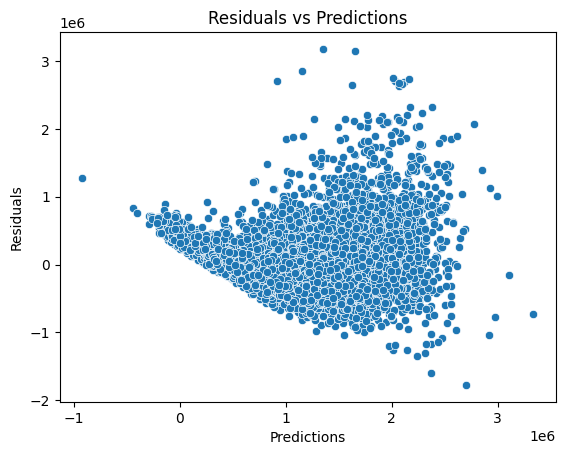

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(df.drop('Price', axis=1))
residuals = df['Price'] - predictions

sns.scatterplot(x=predictions, y=residuals)
plt.title('Residuals vs Predictions')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.show()

- Seems to some sort of a pattern: not how you would expect a linear dataset
- Inidicating Heteroscedasticity: As predicted value increases the variance generally increases. L.R assuumes homoscedasticity

## Improve KNN

In [3]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the parameter grid for n_neighbors
param_grid = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8],
            'weights' : ['uniform', 'distance'],
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
            'metric': ['euclidean', 'cosine', 'manhattan', 'minkowski', 'Chebychev']}

# Initialize the KNN model
knn_model = KNeighborsRegressor()

# Set up Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search model
grid_search.fit(X_train, y_train)

# Get the best model
best_knn_model = grid_search.best_estimator_

# Predict on the test data
y_pred_knn = best_knn_model.predict(X_test)

# Evaluate Performance
print(f"MSE: {mean_squared_error(y_test, y_pred_knn)}")
print(f"RMSE: {mean_squared_error(y_test, y_pred_knn, squared=False)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_knn)}")
print(f"R-squared: {r2_score(y_test, y_pred_knn)}")

# Optionally, print the best parameters
print(f"Best Parameters: {grid_search.best_params_}")


/home/ahmadm79/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
480 fits failed out of a total of 1600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
320 fits failed with the following error:
Traceback (most recent call last):
  File "/home/ahmadm79/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ahmadm79/.local/lib/python3.10/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/home/ahmadm79/.local/lib/python3.10/site-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/home/a

MSE: 118924794982.64774
RMSE: 344854.7447587864
MAE: 215773.846161547
R-squared: 0.6988949024853173
Best Parameters: {'algorithm': 'kd_tree', 'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}


Best Parameters: {'algorithm': 'kd_tree', 'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}

In [85]:
# Predict on the train data

# Evaluate Performance
print(f"MSE: {mean_squared_error(y_train, best_knn_model.predict(X_train))}")
print(f"RMSE: {mean_squared_error(y_train, best_knn_model.predict(X_train), squared=False)}")
print(f"MAE: {mean_absolute_error(y_train, best_knn_model.predict(X_train))}")
print(f"R-squared: {r2_score(y_train, best_knn_model.predict(X_train))}")

MSE: 394509.68466361
RMSE: 628.1000594360822
MAE: 14.363245064096565
R-squared: 0.9999989216732428


In [4]:
best_knn_model

KNeighborsRegressor(algorithm='kd_tree', metric='manhattan', n_neighbors=7,
                    weights='distance')

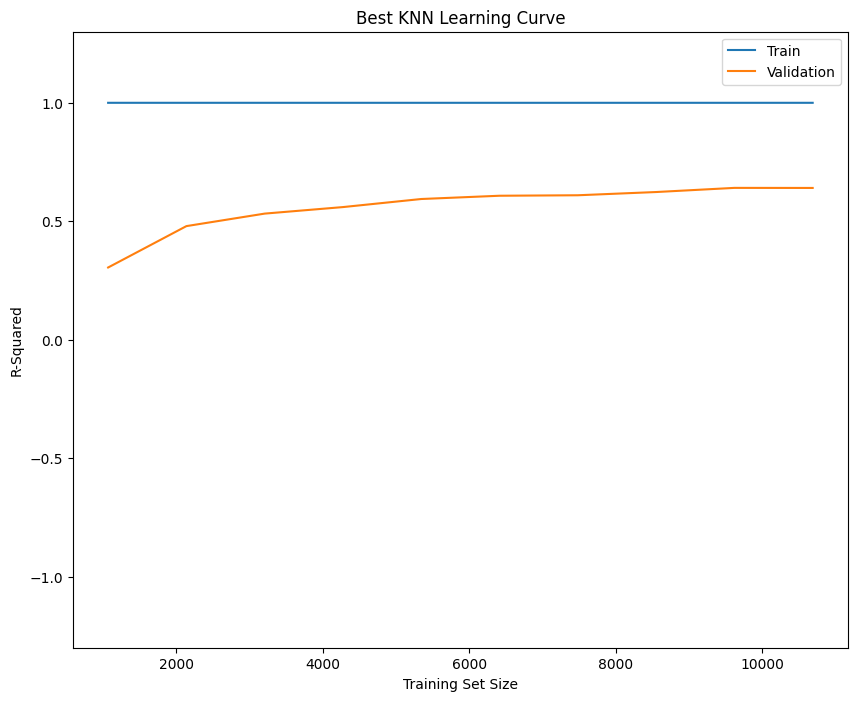

In [7]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(
    estimator=best_knn_model,
    X=X,
    y=y,
    cv=5,
    scoring="r2",
    train_sizes=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.subplots(figsize=(10, 8))
plt.plot(train_sizes, train_mean, label="Train")
plt.plot(train_sizes, test_mean, label="Validation")

plt.title("Best KNN Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("R-Squared")
plt.legend(loc="best")
plt.ylim(-1.3, 1.3)

plt.show()

Conclusion: Performance on training data almost became perfect, but only improved very little bit on test data, so still overfitting.

## Improve DTree

Overfitting was huge in DTree. One way to mitigate this is to use pruning. 

The sklearn library gives us the option to try a range of effective ccp_alphas for overfitting. However, trying all will take too much computation so instead we took
a trial and error approach until a good ccp_alpha value was found, using random sampling and then trying values near the range of the better ccp_alpha values. 

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
import random
import numpy as np

dt = DecisionTreeRegressor(random_state=42)

ccp_alphas = dt.cost_complexity_pruning_path(X_train, y_train)['ccp_alphas']
scores = []
ccp_alphas = random.sample(sorted(ccp_alphas), 100)
for ccp_alpha in ccp_alphas:
    dt = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    score = cross_val_score(dt, X_train, y_train, cv=5)
    scores.append(np.mean(score))

best_ccp_alpha = ccp_alphas[np.argmax(scores)]
dt_pruned = DecisionTreeRegressor(random_state=42, ccp_alpha=best_ccp_alpha)
dt_pruned.fit(X_train, y_train)

y_pred = dt_pruned.predict(X_test)
print(f'Mean Abs Error: {mean_absolute_error(y_test, y_pred)}')
print(f'RMSE: {mean_squared_error(y_test, y_pred, squared=False)}')
print(f'R2: {r2_score(y_test, y_pred)}')
print(best_ccp_alpha)

After a few iterations of keeping track a good baseline value of 16384782.13405671 was found. Now try values around that range

In [24]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

dt = DecisionTreeRegressor(random_state=42)

ccp_alphas = dt.cost_complexity_pruning_path(X_train, y_train)['ccp_alphas']
scores = []
ccp_alphas = [a for a in ccp_alphas if a <= 16384782.13405671 + 100000 and a >= 16384782.13405671 -100000]
for ccp_alpha in ccp_alphas:
    dt = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    score = cross_val_score(dt, X_train, y_train, cv=5)
    scores.append(np.mean(score))

best_ccp_alpha = ccp_alphas[np.argmax(scores)]
dt_pruned = DecisionTreeRegressor(random_state=42, ccp_alpha=best_ccp_alpha)
dt_pruned.fit(X_train, y_train)

y_pred = dt_pruned.predict(X_test)
print(f'Mean Abs Error: {mean_absolute_error(y_test, y_pred)}')
print(f'RMSE: {mean_squared_error(y_test, y_pred, squared=False)}')
print(f'R2: {r2_score(y_test, y_pred)}')
print(best_ccp_alpha)

Mean Abs Error: 210593.95869906966
RMSE: 356105.70020277385
R2: 0.6789271762911879
16420979.539003741


In [26]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

dt = DecisionTreeRegressor(random_state=42)

ccp_alphas = dt.cost_complexity_pruning_path(X_train, y_train)['ccp_alphas']
scores = []
ccp_alphas = [a for a in ccp_alphas if a <= 16420979.539003741 + 100000 and a >= 16420979.539003741 -100000]
for ccp_alpha in ccp_alphas:
    dt = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    score = cross_val_score(dt, X_train, y_train, cv=5)
    scores.append(np.mean(score))

best_ccp_alpha = ccp_alphas[np.argmax(scores)]
dt_pruned = DecisionTreeRegressor(random_state=42, ccp_alpha=best_ccp_alpha)
dt_pruned.fit(X_train, y_train)

y_pred = dt_pruned.predict(X_test)
print(f'Mean Abs Error: {mean_absolute_error(y_test, y_pred)}')
print(f'RMSE: {mean_squared_error(y_test, y_pred, squared=False)}')
print(f'R2: {r2_score(y_test, y_pred)}')
print(best_ccp_alpha)

Mean Abs Error: 210454.20447956794
RMSE: 356036.61720689223
R2: 0.6790517377405954
16511808.167927034


In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

dt = DecisionTreeRegressor(random_state=42)

ccp_alphas = dt.cost_complexity_pruning_path(X_train, y_train)['ccp_alphas']
scores = []
ccp_alphas = [a for a in ccp_alphas if a <= 16511808.167927034 + 900000 and a >= 16511808.167927034 - 900000]
for ccp_alpha in ccp_alphas:
    dt = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    score = cross_val_score(dt, X_train, y_train, cv=5)
    scores.append(np.mean(score))

best_ccp_alpha = ccp_alphas[np.argmax(scores)]
dt_pruned = DecisionTreeRegressor(random_state=42, ccp_alpha=best_ccp_alpha)
dt_pruned.fit(X_train, y_train)

y_pred = dt_pruned.predict(X_test)
print(f'Mean Abs Error: {mean_absolute_error(y_test, y_pred)}')
print(f'RMSE: {mean_squared_error(y_test, y_pred, squared=False)}')
print(f'R2: {r2_score(y_test, y_pred)}')
print(best_ccp_alpha)

Mean Abs Error: 210207.58492144305
RMSE: 355611.137847647
R2: 0.6798183738598307
17371884.844515204


At this point we can't really find a better ccp_alpha value than 17371884.844515204, with a bit more trial and error a good value of 17281885 was found with r2 of .68

In [42]:
from sklearn.tree import DecisionTreeRegressor

dtree_model = DecisionTreeRegressor(random_state=42, ccp_alpha=17371885-90000)

# Fit the model on the training data
dtree_model.fit(X_train, y_train)

# Predict on the test data
y_pred_dtree = dtree_model.predict(X_test)

# Evaluate Performance
print(f"MSE: {mean_squared_error(y_test, y_pred_dtree)}")
print(f"RMSE: {mean_squared_error(y_test, y_pred_dtree, squared=False)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_dtree)}")
print(f"R-squared: {r2_score(y_test, y_pred_dtree)}")

MSE: 126327864445.22502
RMSE: 355426.31366462586
MAE: 210030.64180411748
R-squared: 0.6801511076966649


In [43]:
17371885-90000

17281885

In [62]:
from sklearn.tree import DecisionTreeRegressor

dtree_model = DecisionTreeRegressor(random_state=42, ccp_alpha=17181895-20000)

# Fit the model on the training data
dtree_model.fit(X_train, y_train)

# Predict on the test data
y_pred_dtree = dtree_model.predict(X_test)

# Evaluate Performance
print(f"MSE: {mean_squared_error(y_test, y_pred_dtree)}")
print(f"RMSE: {mean_squared_error(y_test, y_pred_dtree, squared=False)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_dtree)}")
print(f"R-squared: {r2_score(y_test, y_pred_dtree)}")

MSE: 126296449721.93723
RMSE: 355382.1178983788
MAE: 209986.62047178214
R-squared: 0.6802306464784669


Final value we decided on = 17161895 (17181895-20000 above)

Now similarily to KNN above, do hyperparameter tuning with cross validation to find the best possible dtree model

In [65]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the parameter grid to search
param_grid = {
    'ccp_alpha': [17161895],
    'max_depth': [None, 10, 20, 30, 40, 50],  # None means unlimited depth
    'min_samples_split': [2, 10, 20, 30, 40, 50],
    'min_samples_leaf': [1, 5, 10, 20, 30, 40, 50],
    'max_features': ['auto', 'sqrt', 'log2', None],  # None means use all features
    'max_leaf_nodes': [None, 10, 50, 100, 500]  # None means unlimited number of leaf nodes
}

# Initialize the grid search
grid_search = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_squared_error', 
    cv=5,  
    n_jobs=-1,  # Use all available cores
)

grid_search.fit(X_train, y_train)

# Get the best model
best_dtree_model = grid_search.best_estimator_

# Predict on the test data using the best model
y_pred_dtree = best_dtree_model.predict(X_test)

# Evaluate Performance of the best model
print(f"Best Parameters: {grid_search.best_params_}")
print(f"MSE: {mean_squared_error(y_test, y_pred_dtree)}")
print(f"RMSE: {mean_squared_error(y_test, y_pred_dtree, squared=False)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_dtree)}")
print(f"R-squared: {r2_score(y_test, y_pred_dtree)}")


/home/ahmadm79/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
6300 fits failed out of a total of 25200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4167 fits failed with the following error:
Traceback (most recent call last):
  File "/home/ahmadm79/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ahmadm79/.local/lib/python3.10/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/home/ahmadm79/.local/lib/python3.10/site-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/hom

Best Parameters: {'ccp_alpha': 17161895, 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_leaf': 10, 'min_samples_split': 2}
MSE: 113898060748.60594
RMSE: 337487.86755764415
MAE: 205015.37679685434
R-squared: 0.7116220659161425


In [76]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the parameter grid to search
param_grid = {
    'ccp_alpha': [17161895],
    'max_depth': [None, 10, 20],  # None means unlimited depth
    'min_samples_split': [2],
    'min_samples_leaf': [10],
    'max_leaf_nodes': [None, 500, 1000, 2000, 12000],  # None means unlimited number of leaf nodes,
    'min_weight_fraction_leaf': [0, 0.01, .1, .2,.3,.4,.5, .6, .7, .8,.9, 1]
}

# Initialize the grid search
grid_search = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_squared_error', 
    cv=5,  
    n_jobs=-1,  # Use all available cores
)

grid_search.fit(X_train, y_train)

# Get the best model
best_dtree_model = grid_search.best_estimator_

# Predict on the test data using the best model
y_pred_dtree = best_dtree_model.predict(X_test)

# Evaluate Performance of the best model
print(f"Best Parameters: {grid_search.best_params_}")
print(f"MSE: {mean_squared_error(y_test, y_pred_dtree)}")
print(f"RMSE: {mean_squared_error(y_test, y_pred_dtree, squared=False)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_dtree)}")
print(f"R-squared: {r2_score(y_test, y_pred_dtree)}")


Best Parameters: {'ccp_alpha': 17161895, 'max_depth': None, 'max_leaf_nodes': None, 'min_samples_leaf': 10, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}
MSE: 113898060748.60594
RMSE: 337487.86755764415
MAE: 205015.37679685434
R-squared: 0.7116220659161425


/home/ahmadm79/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
375 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "/home/ahmadm79/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ahmadm79/.local/lib/python3.10/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/home/ahmadm79/.local/lib/python3.10/site-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/home/ahm

Conclude with: Best Parameters: {'ccp_alpha': 17161895, 'max_depth': None, 'max_leaf_nodes': None, 'min_samples_leaf': 10, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}

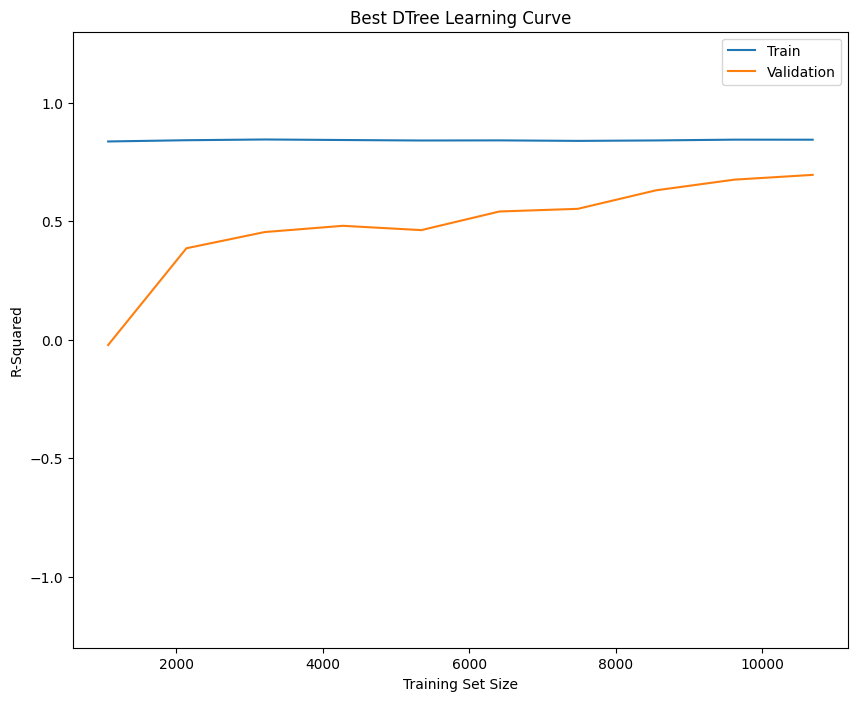

In [80]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(
    estimator=DecisionTreeRegressor(random_state=42, ccp_alpha= 17161895, max_depth= None, max_leaf_nodes= None, min_samples_leaf= 10, min_samples_split= 2, min_weight_fraction_leaf= 0),
    X=X,
    y=y,
    cv=5,
    scoring="r2",
    train_sizes=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.subplots(figsize=(10, 8))
plt.plot(train_sizes, train_mean, label="Train")
plt.plot(train_sizes, test_mean, label="Validation")

plt.title("Best DTree Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("R-Squared")
plt.legend(loc="best")
plt.ylim(-1.3, 1.3)

plt.show()

Conclusion: Were able to reduce overfitting somewhat. Model performance on training set decreased but increased on testing set. 

## Improving XGBoost

Grid Search with cross validation. Same as before.

The grid below was taking too long to experiment, so smalelr subsets were tried and tuned iteratively until the best values were found

In [ ]:
# Define the parameter grid to search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'min_child_weight': [1, 3, 5, 7],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.3, 0.4, 0.5, 0.6, 0.7],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'lambda': [1, 10, 100, 1000],
    'alpha': [0, 0.1, 1, 10],
    'scale_pos_weight': [1, 3, 5, 7]
}

In [89]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV


# Define the parameter grid to search
param_grid = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 3],
    'subsample': [0.6, 0.7],
    'colsample_bytree': [0.3, 0.4],
    'gamma': [0, 0.1, 0.2],
    'lambda': [1, 10],
    'alpha': [0, 0.1],
    'scale_pos_weight': [1, 3]
}

# Initialize the grid search
grid_search = GridSearchCV(
    estimator=XGBRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_squared_error', 
    cv=5,  
    n_jobs=-1,  # Use all available cores
)

grid_search.fit(X_train, y_train)

# Get the best model
best_xgb_model = grid_search.best_estimator_

# Predict on the test data using the best model
y_pred_xgb = best_xgb_model.predict(X_test)

# Evaluate Performance of the best model
print(f"Best Parameters: {grid_search.best_params_}")
print(f"MSE: {mean_squared_error(y_test, y_pred_xgb)}")
print(f"RMSE: {mean_squared_error(y_test, y_pred_xgb, squared=False)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_xgb)}")
print(f"R-squared: {r2_score(y_test, y_pred_xgb)}")


Best Parameters: {'alpha': 0, 'colsample_bytree': 0.4, 'gamma': 0, 'lambda': 10, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 200, 'scale_pos_weight': 1, 'subsample': 0.7}
MSE: 67025629889.30137
RMSE: 258893.08582753106
MAE: 161009.01103457148
R-squared: 0.8302981407136684


In [90]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV


# Define the parameter grid to search
param_grid = {
    'learning_rate': [0.1],
    'n_estimators': [200, 500],
    'max_depth': [5, 6, 7],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.4],
    'gamma': [0],
    'lambda': [10, 100],
    'alpha': [0],
    'scale_pos_weight': [0, 1, 2]
}

# Initialize the grid search
grid_search = GridSearchCV(
    estimator=XGBRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_squared_error', 
    cv=5,  
    n_jobs=-1,  # Use all available cores
)

grid_search.fit(X_train, y_train)

# Get the best model
best_xgb_model = grid_search.best_estimator_

# Predict on the test data using the best model
y_pred_xgb = best_xgb_model.predict(X_test)

# Evaluate Performance of the best model
print(f"Best Parameters: {grid_search.best_params_}")
print(f"MSE: {mean_squared_error(y_test, y_pred_xgb)}")
print(f"RMSE: {mean_squared_error(y_test, y_pred_xgb, squared=False)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_xgb)}")
print(f"R-squared: {r2_score(y_test, y_pred_xgb)}")


Best Parameters: {'alpha': 0, 'colsample_bytree': 0.4, 'gamma': 0, 'lambda': 100, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 500, 'scale_pos_weight': 0, 'subsample': 0.9}
MSE: 62300160947.15066
RMSE: 249600.00189733706
MAE: 153753.82544091504
R-squared: 0.8422625320488522


In [91]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV


# Define the parameter grid to search
param_grid = {
    'learning_rate': [0.1],
    'n_estimators': [500, 700, 1000],
    'max_depth': [7, 8, 9, 10],
    'min_child_weight': [3, 4, 5],
    'subsample': [0.9, 0.95, 1.0],
    'colsample_bytree': [0.4, 0.5],
    'gamma': [0],
    'lambda': [100, 200, 1000],
    'alpha': [0],
    'scale_pos_weight': [0]
}

# Initialize the grid search
grid_search = GridSearchCV(
    estimator=XGBRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_squared_error', 
    cv=5,  
    n_jobs=-1,  # Use all available cores
)

grid_search.fit(X_train, y_train)

# Get the best model
best_xgb_model = grid_search.best_estimator_

# Predict on the test data using the best model
y_pred_xgb = best_xgb_model.predict(X_test)

# Evaluate Performance of the best model
print(f"Best Parameters: {grid_search.best_params_}")
print(f"MSE: {mean_squared_error(y_test, y_pred_xgb)}")
print(f"RMSE: {mean_squared_error(y_test, y_pred_xgb, squared=False)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_xgb)}")
print(f"R-squared: {r2_score(y_test, y_pred_xgb)}")

Best Parameters: {'alpha': 0, 'colsample_bytree': 0.4, 'gamma': 0, 'lambda': 100, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 700, 'scale_pos_weight': 0, 'subsample': 1.0}
MSE: 61589561343.293976
RMSE: 248172.44275562503
MAE: 152702.91134332897
R-squared: 0.844061695655099


In [92]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV


# Define the parameter grid to search
param_grid = {
    'learning_rate': [0.1],
    'n_estimators': [600, 700, 800],
    'max_depth': [7],
    'min_child_weight': [4],
    'subsample': [1.0],
    'colsample_bytree': [0.4],
    'gamma': [0],
    'lambda': [100],
    'alpha': [0],
    'scale_pos_weight': [0]
}

# Initialize the grid search
grid_search = GridSearchCV(
    estimator=XGBRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_squared_error', 
    cv=5,  
    n_jobs=-1,  # Use all available cores
)

grid_search.fit(X_train, y_train)

# Get the best model
best_xgb_model = grid_search.best_estimator_

# Predict on the test data using the best model
y_pred_xgb = best_xgb_model.predict(X_test)

# Evaluate Performance of the best model
print(f"Best Parameters: {grid_search.best_params_}")
print(f"MSE: {mean_squared_error(y_test, y_pred_xgb)}")
print(f"RMSE: {mean_squared_error(y_test, y_pred_xgb, squared=False)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_xgb)}")
print(f"R-squared: {r2_score(y_test, y_pred_xgb)}")

Best Parameters: {'alpha': 0, 'colsample_bytree': 0.4, 'gamma': 0, 'lambda': 100, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 800, 'scale_pos_weight': 0, 'subsample': 1.0}
MSE: 61232035754.23652
RMSE: 247451.07749661652
MAE: 152589.11940377057
R-squared: 0.8449669129175955


In [93]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV


# Define the parameter grid to search
param_grid = {
    'learning_rate': [0.1],
    'n_estimators': [800, 900, 1000, 1100],
    'max_depth': [7],
    'min_child_weight': [4],
    'subsample': [1.0],
    'colsample_bytree': [0.4],
    'gamma': [0],
    'lambda': [100],
    'alpha': [0],
    'scale_pos_weight': [0]
}

# Initialize the grid search
grid_search = GridSearchCV(
    estimator=XGBRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_squared_error', 
    cv=5,  
    n_jobs=-1,  # Use all available cores
)

grid_search.fit(X_train, y_train)

# Get the best model
best_xgb_model = grid_search.best_estimator_

# Predict on the test data using the best model
y_pred_xgb = best_xgb_model.predict(X_test)

# Evaluate Performance of the best model
print(f"Best Parameters: {grid_search.best_params_}")
print(f"MSE: {mean_squared_error(y_test, y_pred_xgb)}")
print(f"RMSE: {mean_squared_error(y_test, y_pred_xgb, squared=False)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_xgb)}")
print(f"R-squared: {r2_score(y_test, y_pred_xgb)}")

Best Parameters: {'alpha': 0, 'colsample_bytree': 0.4, 'gamma': 0, 'lambda': 100, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 800, 'scale_pos_weight': 0, 'subsample': 1.0}
MSE: 61232035754.23652
RMSE: 247451.07749661652
MAE: 152589.11940377057
R-squared: 0.8449669129175955


In [95]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV


# Define the parameter grid to search
param_grid = {
    'learning_rate': [0.1],
    'n_estimators': [800],
    'max_depth': [7],
    'min_child_weight': [4],
    'subsample': [1.0],
    'colsample_bytree': [0.4],
    'gamma': [0],
    'lambda': [100],
    'alpha': [0],
    'scale_pos_weight': [0]
}

# Initialize the grid search
grid_search = GridSearchCV(
    estimator=XGBRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_squared_error', 
    cv=5,  
    n_jobs=-1,  # Use all available cores
)

grid_search.fit(X_train, y_train)

# Get the best model
best_xgb_model = grid_search.best_estimator_

# Predict on the test data using the best model
y_pred_xgb = best_xgb_model.predict(X_test)

# Evaluate Performance of the best model
print(f"Best Parameters: {grid_search.best_params_}")
print(f"MSE: {mean_squared_error(y_test, y_pred_xgb)}")
print(f"RMSE: {mean_squared_error(y_test, y_pred_xgb, squared=False)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_xgb)}")
print(f"R-squared: {r2_score(y_test, y_pred_xgb)}")

Best Parameters: {'alpha': 0, 'colsample_bytree': 0.4, 'gamma': 0, 'lambda': 100, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 800, 'scale_pos_weight': 0, 'subsample': 1.0}
MSE: 61232035754.23652
RMSE: 247451.07749661652
MAE: 152589.11940377057
R-squared: 0.8449669129175955


Improved by Increasing colsample_bytree.
Try changing values little by little, improving as much as possible

In [103]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV


# Define the parameter grid to search
param_grid = {
    'learning_rate': [0.1],
    'n_estimators': [800],
    'max_depth': [7],
    'min_child_weight': [4],
    'subsample': [1.0],
    'colsample_bytree': [0.95],
    'gamma': [0],
    'lambda': [100],
    'alpha': [0],
    'scale_pos_weight': [0]
}

# Initialize the grid search
grid_search = GridSearchCV(
    estimator=XGBRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_squared_error', 
    cv=5,  
    n_jobs=-1,  # Use all available cores
)

grid_search.fit(X_train, y_train)

# Get the best model
best_xgb_model = grid_search.best_estimator_

# Predict on the test data using the best model
y_pred_xgb = best_xgb_model.predict(X_test)

# Evaluate Performance of the best model
print(f"Best Parameters: {grid_search.best_params_}")
print(f"MSE: {mean_squared_error(y_test, y_pred_xgb)}")
print(f"RMSE: {mean_squared_error(y_test, y_pred_xgb, squared=False)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_xgb)}")
print(f"R-squared: {r2_score(y_test, y_pred_xgb)}")

Best Parameters: {'alpha': 0, 'colsample_bytree': 0.95, 'gamma': 0, 'lambda': 100, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 800, 'scale_pos_weight': 0, 'subsample': 1.0}
MSE: 60454878076.62213
RMSE: 245875.73706370895
MAE: 150696.5026957803
R-squared: 0.8469345945800824


In [107]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV


# Define the parameter grid to search
param_grid = {
    'learning_rate': [0.1],
    'n_estimators': [850],
    'max_depth': [7],
    'min_child_weight': [4],
    'subsample': [1.0],
    'colsample_bytree': [0.95],
    'gamma': [0],
    'lambda': [100],
    'alpha': [0],
    'scale_pos_weight': [0]
}

# Initialize the grid search
grid_search = GridSearchCV(
    estimator=XGBRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_squared_error', 
    cv=5,  
    n_jobs=-1,  # Use all available cores
)

grid_search.fit(X_train, y_train)

# Get the best model
best_xgb_model = grid_search.best_estimator_

# Predict on the test data using the best model
y_pred_xgb = best_xgb_model.predict(X_test)

# Evaluate Performance of the best model
print(f"Best Parameters: {grid_search.best_params_}")
print(f"MSE: {mean_squared_error(y_test, y_pred_xgb)}")
print(f"RMSE: {mean_squared_error(y_test, y_pred_xgb, squared=False)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_xgb)}")
print(f"R-squared: {r2_score(y_test, y_pred_xgb)}")

Best Parameters: {'alpha': 0, 'colsample_bytree': 0.95, 'gamma': 0, 'lambda': 100, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 850, 'scale_pos_weight': 0, 'subsample': 1.0}
MSE: 60264518038.18137
RMSE: 245488.32566576637
MAE: 150520.85948025822
R-squared: 0.8474165662155682


In [114]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV


# Define the parameter grid to search
param_grid = {
    'learning_rate': [0.1],
    'n_estimators': [871],
    'max_depth': [7],
    'min_child_weight': [4],
    'subsample': [1.0],
    'colsample_bytree': [0.95],
    'gamma': [0],
    'lambda': [100],
    'alpha': [0],
    'scale_pos_weight': [0]
}

# Initialize the grid search
grid_search = GridSearchCV(
    estimator=XGBRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_squared_error', 
    cv=5,  
    n_jobs=-1,  # Use all available cores
)

grid_search.fit(X_train, y_train)

# Get the best model
best_xgb_model = grid_search.best_estimator_

# Predict on the test data using the best model
y_pred_xgb = best_xgb_model.predict(X_test)

# Evaluate Performance of the best model
print(f"Best Parameters: {grid_search.best_params_}")
print(f"MSE: {mean_squared_error(y_test, y_pred_xgb)}")
print(f"RMSE: {mean_squared_error(y_test, y_pred_xgb, squared=False)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_xgb)}")
print(f"R-squared: {r2_score(y_test, y_pred_xgb)}")

Best Parameters: {'alpha': 0, 'colsample_bytree': 0.95, 'gamma': 0, 'lambda': 100, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 871, 'scale_pos_weight': 0, 'subsample': 1.0}
MSE: 60206606920.5589
RMSE: 245370.3464572663
MAE: 150448.1761847399
R-squared: 0.8475631910865334


In [137]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV


# Define the parameter grid to search
param_grid = {
    'learning_rate': [0.1],
    'n_estimators': [871],
    'max_depth': [7],
    'min_child_weight': [5],
    'subsample': [1.0],
    'colsample_bytree': [0.95],
    'gamma': [0],
    'lambda': [100],
    'alpha': [0],
    'scale_pos_weight': [0]
}

# Initialize the grid search
grid_search = GridSearchCV(
    estimator=XGBRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_squared_error', 
    cv=5,  
    n_jobs=-1,  # Use all available cores
)

grid_search.fit(X_train, y_train)

# Get the best model
best_xgb_model = grid_search.best_estimator_

# Predict on the test data using the best model
y_pred_xgb = best_xgb_model.predict(X_test)

# Evaluate Performance of the best model
print(f"Best Parameters: {grid_search.best_params_}")
print(f"MSE: {mean_squared_error(y_test, y_pred_xgb)}")
print(f"RMSE: {mean_squared_error(y_test, y_pred_xgb, squared=False)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_xgb)}")
print(f"R-squared: {r2_score(y_test, y_pred_xgb)}")

Best Parameters: {'alpha': 0, 'colsample_bytree': 0.95, 'gamma': 0, 'lambda': 100, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 5, 'n_estimators': 871, 'scale_pos_weight': 0, 'subsample': 1.0}
MSE: 59831183791.15908
RMSE: 244604.13690524345
MAE: 150529.4726854884
R-squared: 0.8485137230424951


Best Parameters: {'alpha': 0, 'colsample_bytree': 0.95, 'gamma': 0, 'lambda': 100, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 5, 'n_estimators': 871, 'scale_pos_weight': 0, 'subsample': 1.0}

In [138]:
best_xgb_model

XGBRegressor(alpha=0, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.95, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, lambda=100, learning_rate=0.1,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=871, n_jobs=None, ...)

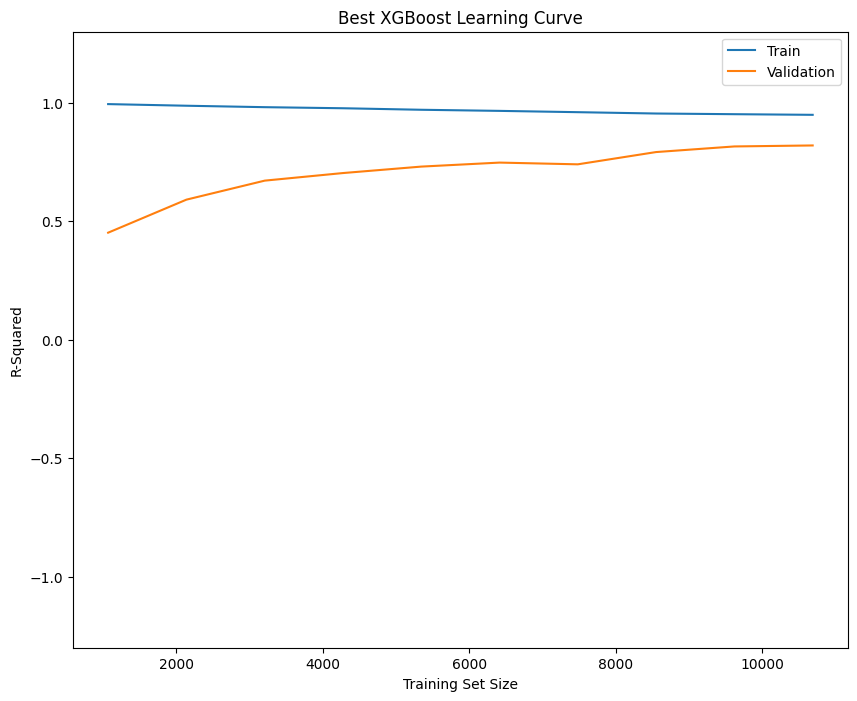

In [139]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(
    estimator=best_xgb_model,
    X=X,
    y=y,
    cv=5,
    scoring="r2",
    train_sizes=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.subplots(figsize=(10, 8))
plt.plot(train_sizes, train_mean, label="Train")
plt.plot(train_sizes, test_mean, label="Validation")

plt.title("Best XGBoost Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("R-Squared")
plt.legend(loc="best")
plt.ylim(-1.3, 1.3)

plt.show()

## Whats Left

Metrics
Compare (Should be easy, did most) : Which Model to select

Challenges Faced

Next Steps for deploying (ie mention keeping up to date)

Future Improvements - Additional Data? Etc